In [1]:
import numpy as np
from StatisticalAnalysis import compare_methods

In [2]:
import warnings
warnings.filterwarnings('ignore')

First we load the data and process it to have the correct form.

In [3]:
ts_hc = np.load('ts_hc.npy')
ts_schz = np.load('ts_schz.npy')

In [4]:
ts_hc = ts_hc.reshape(52,142*118)

In [5]:
ts_schz = ts_schz.reshape(50,142*118)

In [6]:
X = np.append(ts_hc,ts_schz,axis=0)

In [7]:
X.shape

(102, 16756)

In [8]:
X[0].shape

(16756,)

In [9]:
Y = np.append(np.zeros(52),np.ones(50),axis=0)

In [10]:
Y.shape

(102,)

Now, we define the algorithms that we are going to use. 

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint as sp_randint

In [12]:
# Decision tree
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Logistic regression
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000]}
# Neural Network
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': sp_randint(0.0001, 1), 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
                 'momentum': [0.9, 0.95, 0.99]}
# RandomForest
clfRF = RandomForestClassifier(random_state=84)
param_distRF =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}
# ExtraTreesClassifier
clfET = ExtraTreesClassifier(random_state=84)
param_distET =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}

In [13]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP,clfRF,clfET]

In [14]:
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP,param_distRF, param_distET]

In [15]:
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP","RF","ET"]

# Plain comparison

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.567857 (0.190531)
SVM: 0.731964 (0.105599)
KNN: 0.700417 (0.080373)
LR: 0.688750 (0.143604)
MLP: 0.635179 (0.163971)
RF: 0.631905 (0.105488)
ET: 0.682679 (0.075463)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.957773, p:0.018892
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.794373, p:0.114611
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

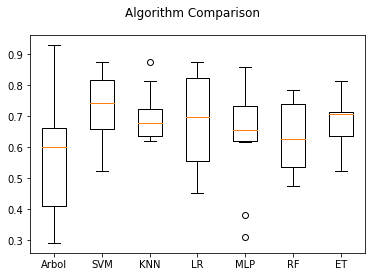

In [16]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='auroc')

# PCA with 2 components

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)

In [19]:
pca.fit(X)

PCA(n_components=2)

In [20]:
X_pca2 = pca.transform(X)

In [21]:
X_pca2.shape

(102, 2)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.646190 (0.105462)
SVM: 0.626488 (0.164797)
KNN: 0.668155 (0.187567)
LR: 0.551012 (0.203379)
MLP: 0.485298 (0.158442)
RF: 0.660476 (0.133606)
ET: 0.688512 (0.147907)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.987991, p:0.744469
The null hypothesis (normality) is accepted
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.804014, p:0.570565
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are fulfilled
-

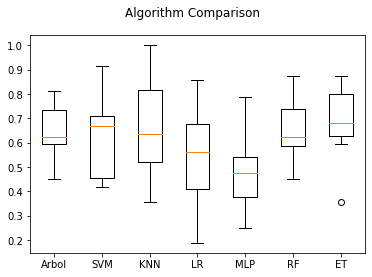

In [22]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='auroc')

# PCA with 10 components

In [23]:
pca = PCA(n_components=10)

In [24]:
pca.fit(X)

PCA(n_components=10)

In [25]:
X_pca10 = pca.transform(X)

In [26]:
!mv temp.csv temppca2.csv

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.683869 (0.191571)
SVM: 0.658810 (0.117937)
KNN: 0.609405 (0.153158)
LR: 0.704524 (0.095990)
MLP: 0.553036 (0.153642)
RF: 0.616548 (0.174698)
ET: 0.562679 (0.126478)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.985671, p:0.607615
The null hypothesis (normality) is accepted
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.733594, p:0.624386
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are fulfilled
-

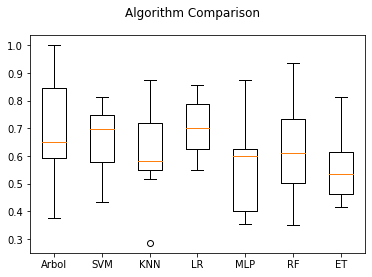

In [27]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [28]:
!mv temp.csv temppca10.csv

# PCA with 100 components

In [29]:
pca = PCA(n_components=100)

In [30]:
pca.fit(X)

PCA(n_components=100)

In [31]:
X_pca100 = pca.transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.494345 (0.188318)
SVM: 0.731964 (0.105599)
KNN: 0.709940 (0.088291)
LR: 0.710000 (0.137790)
MLP: 0.512857 (0.154670)
RF: 0.603393 (0.184920)
ET: 0.543155 (0.163670)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.948293, p:0.005908
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.014641, p:0.424025
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

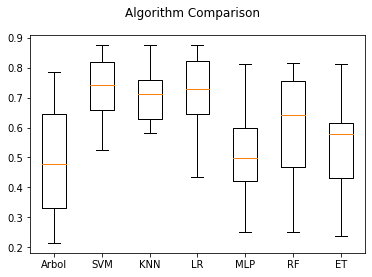

In [32]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [33]:
!mv temp.csv temppca100.csv

# TSNE with 2 components

In [34]:
from sklearn.manifold import TSNE

In [35]:
Xtsne2 = TSNE(n_components=2).fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.468988 (0.190221)
SVM: 0.575655 (0.100517)
KNN: 0.527321 (0.093603)
LR: 0.462321 (0.080926)
MLP: 0.445119 (0.094505)
RF: 0.493690 (0.121227)
ET: 0.562738 (0.152469)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.954142, p:0.012018
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.343012, p:0.251689
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

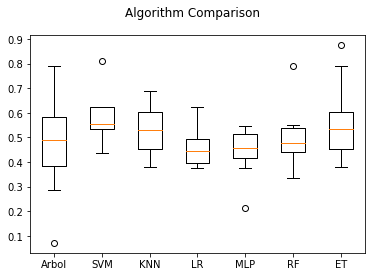

In [36]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [37]:
!mv temp.csv temptsne2.csv

# TSNE with 3 components

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.638214 (0.145540)
SVM: 0.498095 (0.164871)
KNN: 0.477262 (0.126311)
LR: 0.500357 (0.162277)
MLP: 0.527262 (0.105015)
RF: 0.571071 (0.155452)
ET: 0.538929 (0.139854)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.974181, p:0.156875
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.672843, p:0.671901
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

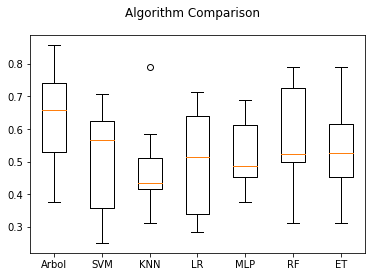

In [38]:
Xtsne3 = TSNE(n_components=3).fit_transform(X)
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [39]:
!mv temp.csv temptsne3.csv

# UMAP with 2 components

In [40]:
from umap import UMAP

In [41]:
reducer = UMAP()

In [42]:
Xumap = reducer.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.683333 (0.092924)
SVM: 0.538929 (0.160124)
KNN: 0.795833 (0.090127)
LR: 0.544702 (0.138303)
MLP: 0.610357 (0.106132)
RF: 0.676607 (0.123127)
ET: 0.741190 (0.094931)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.966886, p:0.060751
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.763570, p:0.601265
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

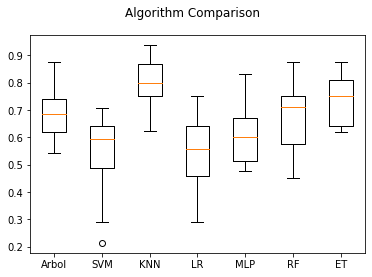

In [43]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [44]:
!mv temp.csv tempumap2.csv

# UMAP with 10 components

In [45]:
reducer = UMAP(n_components=10)

In [46]:
Xumap10 = reducer.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.589524 (0.084705)
SVM: 0.724226 (0.154036)
KNN: 0.673750 (0.151063)
LR: 0.707857 (0.140641)
MLP: 0.719583 (0.091548)
RF: 0.682083 (0.122155)
ET: 0.720060 (0.116902)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.940566, p:0.002398
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.538726, p:0.028936
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

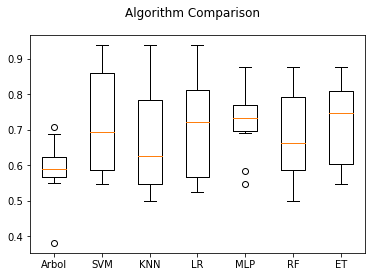

In [47]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [48]:
!mv temp.csv tempumap10.csv